# Unidad 02 - Sesión 01 - Semana 04: Carga de Datos

- **Materia:** Programación para Analítica Descriptiva y Predictiva
- **Unidad 02:** Análisis Descriptivo
- **Tema 01:** Recoleción de Datos
- **Profesor:** Dr. Vicente García Jiménez
- **Objetivo:** En esta sesión profundizaremos sobre el tema de la carga de datos con Pandas. Aunque en clases pasadas vimos algunos ejemplos sencillos sobre cómo leer datos usando `pd.read*()`, esta vez veremos los problemas más comunes que pueden existir al cargar un archivo y cómo abordarlos.

Como se pudo ver en la diapositiva, Pandas permite cargar diversos formatos de archivo cuyos datos pueden considerarse *tabulares*. Empezaremos por el formato más popular que es **CSV** y por similitud con este tipo los archivos de **Excel**


¡Recuerda que es importante conectar tu Colab y también el Drive!

Para poder ejecutar este *notebook* es importante que hayas colocado los archivos de trabajo en `drive/MyDrive/Unidad02/`


## **Sintaxis Básica de Pandas**

Para cargar un archivo, de los formatos mencionados en la diapositiva, es importante que primero se importe la biblioteca de pandas:



```python
# Se importa la biblioteca de Pandas y se le asigna a un alias que es pd
import pandas as pd
```

Una vez realizado lo anterior ya se pueden usar funciones de lectura acorde al tipo de archivos.

En general, la sintaxis básica es la siguiente `df=pd.read_tipoformato(parámetros)`, donde `df` es una variable de tipo `dataframe` y `tipoformato`puede ser sustituido por algunas de las siguientes palabras:

*   csv: `df=pd.read_csv()`
*   excel: `df=pd.read_excel()`
*   json: `df=pd.read_json()`
*   sql: `df=pd.read_sql()`
*   parquet: `df=pd.read_parquet()`
*   txt: `df=pd.read_txt()`
* y otros más!

El objetivo es construir dataframe que se caracteriza por tener la siguiente estructura:


*   Columnas
*   Filas
* Ìndice
* Cada columna un nombre




## **CSV**

El CSV (Comma-Separted Values) es un formato de archivo de texto simple que se utiliza para almacenar datos estructurados en forma de tabla. Cada línea del archivo representa una línea, y los valores de cada columna están separados por comas (`,`), u otros delimitadors como punto y coma (`;`), o inclusive un tabulador.

Un ejemplo sencillo del contenido de un archivo CSV es el siguiente:

**Nombre,Edad,Ciudad**

Ana,30,Madrid

Luis,40,Barcelona

María,25,Valencia

En este caso, observamos que la **Fila 1** contiene los nombres de las columnas (**Encabezados**) y las **filas siguientes** los valores de los datos.

A lo largo de las siguientes secciones veremos diversos ejemplos para leer un archivo `csv`,así como las diferentes estrategias cuando estos presentan ciertas características que son necesarias abordar para obtener un `dataframe` apropiado para el AD y el AED.



### *Lectura con diversos símbolos separadores*

**Ejemplo 1:** Algunos `csv` emplean diferentes símbolos como separadores.En la siguiente celda se lee un archivo que está separado por comas. Este archivo tiene 6 columnas. Observa que automáticament se asigna un índice a cada fila

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv")

#imprimimos el archivo completo
print(df.head())

                      time                                 place magType  mag  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia     mww  6.7   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia     mww  5.2   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu     mww  5.7   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala     mww  5.7   
4  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea     mww  5.6   

   alert  tsunami  
0  green        1  
1  green        0  
2  green        0  
3  green        0  
4  green        1  



**Ejemplo 2:** Para la lectura de una archivo que utiliza como seperador el punto y coma es necesario indicar en la instrucción dicho símbolo. En caso de no hacerlo el archivo cargado no se ajustará a lo esperado.

Para indicar el símbolo separador se usa el parámetro `sep`, el cual, es una variable que almacena el símbolo o también una expresión regular.

En el siguiente ejemplo ejecuta la versión en la que se indica el separador y posteriormente en la que se omite. Observa lo que sucede y apoyate de la instrucción `df.shape`.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene punto y coma
df = pd.read_csv("drive/MyDrive/Unidad02/ex02.csv",sep=';')

#No se indica el separador
#df = pd.read_csv("drive/MyDrive/Unidad02/ex02.csv")

#imprimimos las primeras 3 filas
print(df.head(3))
#df.shape

                      time                            place magType  mag  \
0  2018-10-13 11:10:23.560  262km NW of Ozernovskiy, Russia     mww  6.7   
1  2018-10-13 04:34:15.580      25km E of Bitung, Indonesia     mww  5.2   
2  2018-10-13 00:13:46.220        42km WNW of Sola, Vanuatu     mww  5.7   

   alert  tsunami  
0  green        1  
1  green        0  
2  green        0  



**Ejemplo 3:** Otra situación es que el separador es el espacio en blanco. Sin embargo, debido a que puede ser uno o varios espacios en blancos, es posible apoyarse en las expresiones regulares para indicar en `sep` esta situación.

El archivo ex03.csv contiene los siguientes elementos. En el código que se proporciona se escribe una expresión regular para indicar que el separador puede ser uno o más espacios en blanco (`\s+`).

En la siguiente imagen se muestra el contenido del archivo `ex03.csv`.

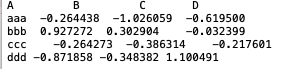

In [2]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex03.csv", sep="\s+")

#imprimimos las primeras 3 filas
print(df.head(3))

     A         B         C         D
0  aaa -0.264438 -1.026059 -0.619500
1  bbb  0.927272  0.302904 -0.032399
2  ccc -0.264273 -0.386314 -0.217601


**Ejemplo 4:** Es posible que el archivo csv tenga múltiples separadores. Para ello, usamos también las expresiones regulares.

El archivo ex06.csv contiene la siguiente información:

ID|Nombre;Edad,Ciudad
1|Ana;23,Madrid
2|Luis;30,Barcelona
3|María;25,Valencia

Aquì hay tres tipos de separadores diferentes: `|`, `;` y `,`. Veamos el ejemplo:

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

df = pd.read_csv("drive/MyDrive/Unidad02/ex06.csv", sep="[\|,;]", engine="python")

print(df)

   ID Nombre  Edad     Ciudad
0   1    Ana    23     Madrid
1   2   Luis    30  Barcelona
2   3  María    25   Valencia


### *Encabezados*

En AD, AED y Machine Learning, siempre es deseable que los archivos tengan una fila (encabezado) que representa los nombres de cada columna (variable). Sin embargo, esto a veces no es así. Por lo tanto es importante especificar que el archivo no tiene un encabezado. Esto se hace por medio de `header=None`.


**Ejemplo 1:** En el siguiente ejemplo ejecuta la versión donde se indica que no existe un encabezado y la otra donde se omite. Observa lo que sucede.

In [1]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv", header=None)

#No se especifica que el archivo no contiene un encabezado
#df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv")

#imprimimos las primeras 3 filas
print(df.head(3))

                         0                              1    2    3      4  5
0  2018-10-13 11:10:23.560  262km NW of Ozernovskiy Rusia  mww  6.7  green  1
1  2018-10-13 04:34:15.580     25km E of Bitung Indonesia  mww  5.2  green  0
2  2018-10-13 00:13:46.220       42km WNW of Sola Vanuatu  mww  5.7  green  0



**Ejemplo 2:** Si no queremos que Pandas le asigne un nombre por default a las columnas, entonces, podemos especificar los nombres por medio del parámetro `names=lista`. En este caso, se omite el parámetro `header`.

En el siguiente ejemplo se muestran dos formas de hacer lo anterior.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Primera version
df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv",
                 names=["time","place","magType","mag","alert","tsunami"])

#Segunda versión - declaramos una variable de tipo lista con los nombres
#mynames=["time","place","magType","mag","alert","tsunami"]
#df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv", names=mynames)


#imprimimos las primeras 3 filas
print(df.head(3))

                      time                          place magType  mag  alert  \
0  2018-10-13 11:10:23.560  262km NW of Ozernovskiy Rusia     mww  6.7  green   
1  2018-10-13 04:34:15.580     25km E of Bitung Indonesia     mww  5.2  green   
2  2018-10-13 00:13:46.220       42km WNW of Sola Vanuatu     mww  5.7  green   

   tsunami  
0        1  
1        0  
2        0  



**Ejemplo 3:** Si el csv ya tiene encabezados, puedes omitir el encabezado original y usar los nueevos nombres. Para ello, usaremos el parámetro `skiprows=lista con indices de filas a ignorar`.

En el siguiente ejemplo leemos er archivo `ex01.csv' que contiene un encabezado.  Crearemos una variable que contendrá los nuevos nombres que sustituirán a los originales y asignamos `skiprows=1`.

Ejecuta el código eliminando `skiprows=1` y observa lo que sucede.


In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

nuevos_nombres = ["tiempo_nuevo","lugar_nuevo","tipo_magnitud_nuevo","magnitud_nuevo","alerta_nuevo","tsu_nuevo"]

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv", names = nuevos_nombres,skiprows=1)

#imprimimos el archivo completo
print(df.head())

              tiempo_nuevo                           lugar_nuevo  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala   
4  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea   

  tipo_magnitud_nuevo  magnitud_nuevo alerta_nuevo  tsu_nuevo  
0                 mww             6.7        green          1  
1                 mww             5.2        green          0  
2                 mww             5.7        green          0  
3                 mww             5.7        green          0  
4                 mww             5.6        green          1  



**Ejemplo 4:** Existen conjunto de datos donde el número de columnas es mayor a 2,000. En algunos datos este número puede ser de 54,686,452 (columnas). Vea el caso del conjunto de datos kdd2012 en el repositorio [LIBSVM Data](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#kdd2012).

Algunos repositorios proveen un archivo de texto con los nombres de las columnas, en donde, con un nombre por línea. Si esto es así podemos leer dicho archivo de texto y guardar cada nombr en una lista.

In [ ]:
import pandas as pd

# Cargar nombres de columnas desde un archivo de texto
with open("drive/MyDrive/Unidad02/columnas.txt", "r") as f:
    nombres_columnas = [line.strip() for line in f]

# Leer el CSV y asignar los nombres
df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv", names=nombres_columnas, header=None)

# Mostrar las primeras filas
print(df.head())


                  time_txt                             place_txt magType_txt  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia         mww   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia         mww   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu         mww   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala         mww   
4  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea         mww   

   mag_txt alert_txt  tsunami_txt  
0      6.7     green            1  
1      5.2     green            0  
2      5.7     green            0  
3      5.7     green            0  
4      5.6     green            1  



**Ejemplo 5:** Una segunda opción es generar los nombres automáticamente con un prefijo y un índice. En el siguiente ejemplo, primero se lee el archivo y posteriormente se modifica los nombres de las columnas con `df.columns`, el cual almacena los nombres de las columnas del `dataframe`.

Al hacer `df.columns = [...]`,reemplazamos los nombres originles por los generados

In [ ]:
import pandas as pd

# Leer el CSV sin encabezado
df = pd.read_csv("drive/MyDrive/Unidad02/ex04.csv", header=None)

print(df.head())

# Generar nombres de columnas automáticamente
#se genera una lista ["Columna_0", "Columna_1", "Columna_2", ..., "Columna_N"]
df.columns = [f"MiColumna_{i}" for i in range(df.shape[1])]

print(df.head())


                         0                                     1    2    3  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia  mww  6.7   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia  mww  5.2   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu  mww  5.7   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala  mww  5.7   
4  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea  mww  5.6   

       4  5  
0  green  1  
1  green  0  
2  green  0  
3  green  0  
4  green  1  
               MiColumna_0                           MiColumna_1 MiColumna_2  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia         mww   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia         mww   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu         mww   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala         mww   
4  2018-10-12 02:52:03.620    128km SE of Kimbe

###*Omitir Filas y Columnas*

Pandas permite omitir filas y columnas al leer un archivo CSV usando los parámetros skiprows, skipfooter y usecols.

**Ejemplo 1:** Omitir las primeras `n` filas (`skiprows`)
Si un archivo CSV tiene filas iniciales innecesarias, puedes ignorarlas con skiprows.


In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
#Se omiten las 2 primeras filas
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv", skiprows=2)

#imprimimos el archivo completo
print(df.head())

   2018-10-13 04:34:15.580            25km E of Bitung Indonesia  mww  5.2  \
0  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu  mww  5.7   
1  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala  mww  5.7   
2  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea  mww  5.6   

   green  0  
0  green  0  
1  green  0  
2  green  1  


**Ejemplo 2**: Omitir filas específicas (`skiprows` con lista)

Si quieres omitir filas específicas, puedes pasar una lista de índices. En el siguiente ejemplo se omiten las filas 1 y 3 (índices 1 y 3, empezando desde 0)

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
# omiten las filas 1 y 3 (índices 1 y 3, empezando desde 0)
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv", skiprows=[1,3])

#imprimimos el archivo completo
print(df.head())

                      time                                 place magType  mag  \
0  2018-10-13 04:34:15.580            25km E of Bitung Indonesia     mww  5.2   
1  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala     mww  5.7   
2  2018-10-12 02:52:03.620    128km SE of Kimbe Papua New Guinea     mww  5.6   

   alert  tsunami  
0  green        0  
1  green        0  
2  green        1  


**Ejemplo 3**: Omitir las últimas `n` filas (`skipfooter`)

Si el csv tiene datos irrelevantes al final, se puede usar `skipfooter`. En el siguiente ejemplo se omite la última fila.

Observa también que se usa el parámetro `engine="python"`, el cual le indica a Pandas que se debe de usar l motor de análisis de archivos de texto de Python, en lugar del motor determinado basado en el lenguaje C.



In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
# omiten las filas 1 y 3 (índices 1 y 3, empezando desde 0)
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv", skipfooter=1,engine="python")

#imprimimos el archivo completo
print(df.head())

                      time                                 place magType  mag  \
0  2018-10-13 11:10:23.560         262km NW of Ozernovskiy Rusia     mww  6.7   
1  2018-10-13 04:34:15.580            25km E of Bitung Indonesia     mww  5.2   
2  2018-10-13 00:13:46.220              42km WNW of Sola Vanuatu     mww  5.7   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion Guatemala     mww  5.7   

   alert  tsunami  
0  green        1  
1  green        0  
2  green        0  
3  green        0  


**Ejemplo 4**: Cargar solo columnas específicas (`usecols`)

Si el csv tiene muchas columnas pero solo necesitas algunas, podemos usar `usecols`.


In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
# Código en Pandas para cargar solo "magType","mag","tsunami"
df = pd.read_csv("drive/MyDrive/Unidad02/ex01.csv", usecols=["magType","mag","tsunami"])

#imprimimos el archivo completo
print(df.head())

  magType  mag  tsunami
0     mww  6.7        1
1     mww  5.2        0
2     mww  5.7        0
3     mww  5.7        0
4     mww  5.6        1


### *Caracteres Especiales*

Algunos archivos csv puden contener caracteres especiales como acento, eñes y otros símbolos. Para evitar problemas al leer dicho archivo o caracteres extraños, se requiere usar el parámetro `encoding="utf-8"`

El archivo `ex07.csv`contiene la siguiente información:

ID,Nombre,País,Comentario

1,Ana,España,"Estudió en la universidad pública de Madrid"

2,Luis,México,"Le encanta la programación y la música 🎵"

3,María,Francia,"Habla francés, inglés y español"

4,José,Brasil,"Trabaja en São Paulo"

5,Sofía,Alemania,"Investigadora en física cuántica ⚛️"



In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex07.csv",encoding="utf-8")

#imprimimos el archivo completo
print(df.head())

   ID Nombre      País                                   Comentario
0   1    Ana    España  Estudió en la universidad pública de Madrid
1   2   Luis    México     Le encanta la programación y la música 🎵
2   3  María   Francia              Habla francés, inglés y español
3   4   José    Brasil                         Trabaja en São Paulo
4   5  Sofía  Alemania          Investigadora en física cuántica ⚛️


### *Valores Perdidos*

Cuando los datos se exportan a CSV desde diferentes sistemas, los valores faltantes pueden especificarse con distintos símbolos.

Los valores predeterminados que Pandas interpreta como NA/NaN son:
`''`, `#N/A`, `#N/A`, `N/A`, `#NA`, `-1.#IND`, `-1.#QNAN`, `-NaN`, `-nan`, `1.#IND`, `1.#QNAN`, `N/A`, `NA`, `NULL`, `NaN`, `n/a`, `nan`, `null`.

**Ejemplo 1:** El archivo ex08.csv contiene 3 valores perdidos que se identifican con el valor `NaN` y `??`. Observa que salida produce cuando se emplea la instrucción `pd.isna(df)`

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex08.csv")

#imprimimos el archivo completo
print(df.head())

#Mostramos las celdas en las que aparece un dato perdido
print(pd.isna(df))

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5  ??   NaN   8   world
2     three  9  10  11.0  12     foo
   something      a      b      c      d  message
0      False  False  False  False  False     True
1      False  False  False   True  False    False
2      False  False  False  False  False    False


**Ejemplo 02:** los caracteres `??` denotan un valor perdido, este no fue detectado como tal. Para que esto ocurra, el parámetro `na_values` permite personalizar la lista de caracteres que se reconocerán como valores faltantes.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex08.csv",na_values=["??"])

#imprimimos el archivo completo
print(df.head())

print(pd.isna(df))

  something  a     b     c   d message
0       one  1   2.0   3.0   4     NaN
1       two  5   NaN   NaN   8   world
2     three  9  10.0  11.0  12     foo
   something      a      b      c      d  message
0      False  False  False  False  False     True
1      False  False   True   True  False    False
2      False  False  False  False  False    False


### *Archivos Grandes CSV*

Procesar archivos csv grandes en Pandas requiere estrategias avanzadas para optimizar memoria y velocidad. Existen diversas estrategias y aquí veremos algunas de ellas.

**Ejemplo 1:** Es posible que tengas la capacidad de cargar el archivo. Sin embargo, al querer imprimir el contenido seguramente tardará y ocupará toda tu pantalla. Una opción es usar la instrucción `pd.options.display.max_rows=número de filas`, la cual se usa para controlar el número máximo de filas que pandas muestra cuando se imprime un `dataframe`.  El efecto de usar esta instrucción es que Pandas trunca la salida si el `dataframe` tiene muchas filas, mostrando solo las primeras y últimas filas con "..." en el medio.

El archivo ex09.csv contiene 5 columnas y 10,000 Filas. En el siguiente ejemplo `pd.options.display.max_rows=10`.


In [3]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

#Limitamos el número de filas a mostrar de las 10,000
pd.options.display.max_rows = 10

# Leemos el archivo que contiene comas
df = pd.read_csv("drive/MyDrive/Unidad02/ex09.csv")

#imprimimos el archivo completo
print(df)


           one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]


**Ejemplo 2:** Esta estrategia es muy sencilla y se enfoca en solo leer un parte (muestra) al especificar el número de filas. Esto te permite una rápida inspección sin cargar todo el archivo en memoria.

En este ejercicio vamos a trabajar con un archivo conocido como NYC Yellow Taxi Trip Data del 2016. Debido al tamaño de este archivo , 1.91 GB, está alojado en una carpeta de Dropbox.

In [4]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

#una variable que contiene la dirección donde está alojado el archivo
url = "https://www.dropbox.com/scl/fo/x4a4a3jst0z0feb8kedz7/AC-g-Xxv6CmyBaL7jeKpiEo?rlkey=pmrtbg5qlxrq397f9lcxfr6iw&dl=1"

df = pd.read_csv(url, nrows=100, sep=',', encoding="utf-8")  # Leer solo 100 filas

print(df.head())

   PK tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0      1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1      1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2      2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3      2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4      2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1             

**Ejemplo 2:** Leer en bloques (`chunksize`), por lo que, en lugar de cargar el archivo completo, Pandas permite procesarlo en bloques más pequeños, evitando el colapso de memoria.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

chunk_size = 1000  # Tamaño del bloque

# Leer el archivo en bloques

for chunk in pd.read_csv("drive/MyDrive/Unidad02/ex09.csv", sep=',', encoding="utf-8", chunksize=chunk_size):
  print(f"Procesando bloque de {chunk_size} filas:")
  print(chunk.head())
  print("\n")


Procesando bloque de 1000 filas:
        one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q


Procesando bloque de 1000 filas:
           one       two     three      four key
1000  0.467976 -0.038649 -0.295344 -1.824726   T
1001 -0.358893  1.404453  0.704965 -0.200638   J
1002 -0.501840  0.659254 -0.421691 -0.057688   R
1003  0.204886  1.074134  1.388361 -0.982404   S
1004  0.354628 -0.133116  0.283763 -0.837063   B


Procesando bloque de 1000 filas:
           one       two     three      four key
2000  0.467976 -0.038649 -0.295344 -1.824726   1
2001 -0.358893  1.404453  0.704965 -0.200638   H
2002 -0.501840  0.659254 -0.421691 -0.057688   F
2003  0.204886  1.074134  1.388361 -0.982404   L
2004  0.354628 -0.133116  0.283763 -0.837063   E


Procesando bloque de 1000 filas

## **Excel**
En esta sesión aprenderemos a cargar, explorar y manipular archivos Excel (`.xlsx`, `.xls`) en Pandas.

Es posible que para poder leer archivos `.xlsx` se requiera instalar la biblioteca `openpyxl` y en el caso de `.xls` sería `xlrd`. Si esto sucede, recuerda que para instalar ambas bibliotecas en Google Colab se tendrían que ejecutar las instrucciones siguientes:


```python
#para .xlsx
!pip install openpyxl
```
y

```python
#para .xls
!pip install xlrd
```

Existen dos funciones para leer archivos de Excel:



1.  `pd.read_excel()` es la forma más común de leer un archivo Excel en un DataFrame. **Es fácil, directo y se usa cuando solo necesitar leer una o pocas hojas**. Sin embargo, si el archivo **tiene varias hojas**, esta función **vuelve a abrir el archivo cada vez que se usa**, lo que hace **lento el proceso de carga**.

2.  `pd.ExcelFile()`, es **apropiado** si el archivo Excel tiene **varias hojas**, en lugar de abrirlo múltiples veces, **abre una vez**, por lo que es posible **extraer múltiples hojas sin volver a cargar el archivo**. No obstante, **requiere un paso extra** (`xls.parse(sheet_name)`) para **leer cada hoja** en un `dataframe`.

En los siguientes ejemplos vamos a usar el archivo `ex10.xls` y `ex11.xlsx`. Ambos son iguales, contienen 4 hojas, donde `Hoja1` y `Hoja2` contienes una tabla sencilla, `source` contiene 2 celdas que indican la fuente de la información de la tercera hoja llamada `OECD.Stat export`. Esta última, es una hoja con colores y celdas que no contienen información, así como otras configuraciones que son habituales en hojas de `Excel`.

### *`pandas.read_excel()`: Leer Directamente un Archivo*

`pd.read_excel()` es la forma más común de leer un archivo Excel, principalmente si solo tiene una o pocas hojas. Esta función requiere el parámetro `sheet_name = nombre de la hoja`, para indicar el nombre de la hoja que queremos leer. Si el archivo tiene varias hojas y no se especifica este parámetro, entonces sólo se leera la primera hoja por defecto.

Si quieres cargar todas las hojas en un solo paso, entonces, deberás usar el parámetro `sheet_name = None`. Sin embargo, observa que esto no devuelve un `dataframe` sino una `variable` de tipo `diccionario`, donde las `claves`son los nombres de las hojas y los `valores`los dataframes de cada hoja.

Para imprimir las hojas disponibles, se usa `variablediccionario.keys()`, la cual retornará un diccionario con el nombre clave de cada hoja. Para acceder al contenido de cada una de ellas, usamos la función `variablediccionario["nombre de la hoja"]`.

**Ejemplo 1:** El siguiente código ejemplifica lo siguiente: 1) se especifica el nombre de la hoja, 2)indica la columna que contiene el índice, 3) leer todas las hojas, 4) indicar qué columnas se quieren leer.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd


#---------------- 1)
#OJO: aquí df es un dataframe
df = pd.read_excel("drive/MyDrive/Unidad02/ex10.xls", sheet_name="Hoja1")

print(df.head())

#---------------- 2)
#Como esta tabla tiene una primera columna que representa el índice
#podemos especificar con index_col el número de columna que sea
#indice.
#Ejecuta el siguiente código
#Aquí df es un dataframe
#df = pd.read_excel("drive/MyDrive/Unidad02/ex10.xls", sheet_name="Hoja1", index_col=0)

#imprime la hoja 1
#print(df.head())

#--------------------------- 3)
#Para leer todas las hojas usa sheet_name=None.
#Recuerda que si no usas este parámetro solo leerá la primera hoja
#Nota: hojas no es un dataframe sino un diccionario
#hojas = pd.read_excel("drive/MyDrive/Unidad02/ex10.xls", sheet_name=None)

#imprime los nombres de todas las hojas
#print(hojas.keys())

#Se almacena en un data frame la Hoja2 (nombre)
#df_hoja2 = hojas["Hoja2"]
#print(df_hoja2)


#------------------- 4)
#podemos leeer ciertas columnas

#df = pd.read_excel("drive/MyDrive/Unidad02/ex10.xls", sheet_name="Hoja2", usecols=["B", "D"])
#print(df.head())


   Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo


### *`pandas.ExcelFile()`: Para Leer Varias Hojas*

Si el archivo Excel tiene varias hojas, en lugar de abrirlo múltiples veces, `ExcelFile` permite abrirlo una vez y extraer múltiples hojas sin volver a cargar el archivo.

 `pandas.ExcelFile()` abre un archivo de Excel en un objeto. No carga todas las hojas de inmediata, solo prepara el archivo para acceder a sus hojas cuando sea necesario. Para ello, se usa `.parse(sheet_name)`que permite extraer las hojas individuales y convertirla en un `dataframe`.

 **Ejemplo 02:** Veremos como accedemos a las hojas del archivo `ex11.xlsx`.

In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

xlsx = pd.ExcelFile("drive/MyDrive/Unidad02/ex10.xls")

#imprimos las hojas disponibles
print(xlsx.sheet_names)

#Leemos la primera hoja llamada Hoja1 e indicamos qué columna usar como índice

df=xlsx.parse(sheet_name="Hoja1", index_col=0)

print(df.head())


#La segunda hoja
df=xlsx.parse(sheet_name="Hoja2", usecols=["B", "D"])

print(df.head())

['Hoja1', 'Hoja2', 'Source', 'OECD.Stat export']
   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo
          B         D
0 -0.264438 -0.619500
1  0.927272 -0.032399
2 -0.264273 -0.217601
3 -0.871858  1.100491


### *Ejemplo con hojas complejas*
En esta receta, importamos un archivo de Excel y abordamos algunos problemas comunes al trabajar con estos archivos: información extra en encabezados y pies de página, selección de columnas específicas, eliminación de filas sin datos y conexión a hojas en particular.

A pesar de la estructura tabular de Excel, que fomenta la organización de datos en filas y columnas, las hojas de cálculo no son conjuntos de datos y no requieren que las personas almacenen la información de esa manera. Incluso cuando algunos datos cumplen con esta estructura, es común encontrar información adicional en filas o columnas antes o después de los datos a importar. Además, los tipos de datos no siempre son evidentes para quien no creó la hoja de cálculo.

Los que haremos es lo siguiente:

- Seleccionaremos la hoja con los datos que necesitamos, pero omiteremos las columnas y filas que no queremos. Usaremos el parámetro `sheet_name` para especificar la hoja.

- Emplearemos `skiprows=4` y `skipfooter=1` para omitir las primeras cuatro filas (la primera fila está oculta) y la última fila, respectivamente.

- Usaremos `usecols` para obtener datos de la columna A y de las columnas C a W (la columna B está en blanco).
- También `head` para ver las primeras filas y `shape` para obtener el número de filas y columnas.


In [ ]:
#Importamos la librería de pandas y asignamos un alias (pd)
import pandas as pd

df = pd.read_excel("drive/MyDrive/Unidad02/ex11.xlsx",
                   sheet_name="OECD.Stat export",
                   skiprows=4,
                   skipfooter=1,
                   usecols="A,C:T")

print(df.head())

                         Year   2001   2002   2003   2004   2005   2006  \
0          Metropolitan areas    NaN    NaN    NaN    NaN    NaN    NaN   
1              AUS: Australia     ..     ..     ..     ..     ..     ..   
2       AUS01: Greater Sydney  43313  44008  45424  45837  45423  45547   
3    AUS02: Greater Melbourne  40125  40894  41602  42188  41484  41589   
4     AUS03: Greater Brisbane  37580  37564  39080  40762  42976  44475   

    2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
2  45880  45225  45900  45672  46535  47350  47225  48510  50075  50519   
3  42316  40975  41384  40943  41165  41264  41157  42114  42928  42671   
4  44635  46192  43507  42774  44166  43764  43379  43754  44388  45723   

    2017   2018  
0    NaN    NaN  
1     ..     ..  
2  50578  49860  
3  43025  42674  
4  46876

## **Importar Datos desde Bases de Datos SQL**

En este ejemplo, utilizamos las API de pymssql y mysql para leer datos desde bases de datos Microsoft SQL Server y MySQL. También es posible que se requiera instalar ambas API.

No profundizaremos en este tema porque require aspectos de Ingeniería de Datos y SQL

En este ejercicio nos conectaremos a una base de datos que está en la nube. Para extraer los datos usaremos una consulta SQL



In [ ]:
!pip install pymssql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.9 MB/s eta 0:00:00


In [ ]:

!pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 62.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp311-cp311-linux_x86_64.whl size=247949 sha256=5a2d7fb29dbe3cf88c1746ac03a1949f1111652e86748b6f579c0c6ac6ac83c2
  Stored in directory: /root/.cache/pip/wheels/17/cd/ed/2d49e9bac69cf09382e4c7cc20a2511202b48324b87db26019
Successfully built mysql-connector


In [ ]:
#1. Importación de bibliotecas
import pandas as pd
import numpy as np
import pymssql
import mysql.connector

# Consulta SQL que selecciona datos de la tabla studentmath.
query = "SELECT studentid, school, sex, age, famsize,\
  medu AS mothereducation, fedu AS fathereducation,\
  traveltime, studytime, failures, famrel, freetime,\
  goout, g1 AS gradeperiod1, g2 AS gradeperiod2,\
  g3 AS gradeperiod3 From studentmath"

#Conexión a la base de datos SQL Server
# use the pymssql api and read_sql to retrieve and load data from a SQL Server instance
server = "pdcc.c9sqqzd5fulv.us-west-2.rds.amazonaws.com"
user = "pdccuser"
password = "pdccpass"
database = "pdcctest"

#Se establece la conexión a una base de datos SQL Server en la nube
conn = pymssql.connect(server=server,
                       user=user, password=password, database=database)

#Ejecución de la consulta y carga en un DataFrame
studentmath = pd.read_sql(query,conn)

#cierra la conexión con la base de datos después de obtener los datos
conn.close()

#imprimimos el dataframe
print(studentmath.head())

<ipython-input-24-cd20bbcfffd5>:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  studentmath = pd.read_sql(query,conn)


  studentid school sex  age famsize  mothereducation  fathereducation  \
0       001     GP   F   18     GT3                4                4   
1       002     GP   F   17     GT3                1                1   
2       003     GP   F   15     LE3                1                1   
3       004     GP   F   15     GT3                4                2   
4       005     GP   F   16     GT3                3                3   

   traveltime  studytime  failures  famrel  freetime  goout  gradeperiod1  \
0           2          2         0       4         3      4             5   
1           1          2         0       5         3      3             5   
2           1          2         3       4         3      2             7   
3           1          3         0       3         2      2            15   
4           1          2         0       4         3      2             6   

   gradeperiod2  gradeperiod3  
0             6             6  
1             5             6  
2 